In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
sample_matrix_A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] # Sample Matrix  to test functions
sample_matrix_B = [[1, -1, 0], [1, 0, -1], [-6, 2, 3]] # Sample Matrix  to test functions

In [ ]:
# Function to compute the transpose of a matrix
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
print(transpose(sample_matrix_A))
print(transpose(sample_matrix_B))

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]
[[1, 1, -6], [-1, 0, 2], [0, -1, 3]]


In [ ]:
# Function to multiply two matrices
def matrix_multiply(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result
print(matrix_multiply(sample_matrix_A, sample_matrix_B))

[[-15, 5, 7], [-27, 8, 13], [-39, 11, 19]]


In [ ]:
def matrix_minor(matrix,i,j):
    return [row[:j] + row[j+1:] for row in (matrix[:i]+matrix[i+1:])]

In [ ]:
def matrix_determinant(matrix):
    #base case for 2x2 matrix
    if len(matrix) == 2:
        return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
    determinant = 0
    for c in range(len(matrix)):
        determinant += ((-1)**c)*matrix[0][c]*matrix_determinant(matrix_minor(matrix,0,c))
    return determinant

In [ ]:
def matrix_inverse(matrix):
    determinant = matrix_determinant(matrix)

    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")

    # Special case for 2x2 matrix
    if len(matrix) == 2:
        return [[matrix[1][1] / determinant, -1 * matrix[0][1] / determinant],
                [-1 * matrix[1][0] / determinant, matrix[0][0] / determinant]]
    #find matrix of cofactors
    cofactors = []
    for r in range(len(matrix)):
        cofactorRow = []
        for c in range(len(matrix)):
            minor = matrix_minor(matrix,r,c)
            cofactorRow.append(((-1)**(r+c)) * matrix_determinant(minor))
        cofactors.append(cofactorRow)
    cofactors = transpose(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors


matrix_inverse(sample_matrix_B)

[[-2.0, -3.0, -1.0], [-3.0, -3.0, -1.0], [-2.0, -4.0, -1.0]]

In [ ]:
def ordinary_least_squares(X, y):
    X_transpose = transpose(X)
    X_transpose_X = matrix_multiply(X_transpose, X)
    X_transpose_X_inverse = matrix_inverse(X_transpose_X)
    X_transpose_y = matrix_multiply(X_transpose, y)  #
    coefficients = matrix_multiply(X_transpose_X_inverse, X_transpose_y)
    return coefficients


In [ ]:
df = pd.read_csv("/content/2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
X = [[1] + list(row) for row in df[["Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom", "Generosity"]].values]
y = [[score] for score in df["Happiness Score"]]
ordinary_least_squares(X, y)

[[2.5155818623352424],
 [1.4811523106561637],
 [0.8776143900527025],
 [2.1646327851216114],
 [0.5308806357210472]]

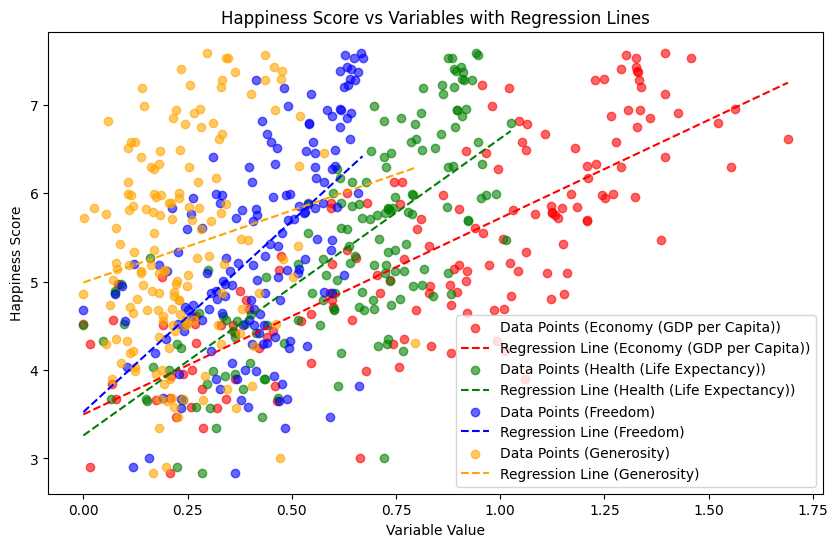

In [ ]:

# Define the colors for each variable
colors = ["red", "green", "blue", "orange"]
# Define the names of the variables to be analyzed
variable_names = ["Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom", "Generosity"]

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Loop through each variable to perform  linear regression and plot
for i, variable_name in enumerate(variable_names):
    # Extract the column corresponding to the current variable
    # Assuming X is a list of lists where each row contains multiple variables
    variable_values = [row[i + 1] for row in X if len(row) > i + 1]


    # Prepare the variable data for regression
    X_simple = np.array(variable_values).reshape(-1, 1)  # Convert variable values to a 2D NumPy array
    X_simple = np.hstack([np.ones_like(X_simple), X_simple])  # Add a column of ones for the intercept term

    # Fitting a regression model using ordinary least squares
    simple_coefficients = ordinary_least_squares(X_simple.tolist(), y)  # Calling the previously defined ordinary_least_squares function

    # Extracting intercept and slope from the computed coefficients
    intercept = simple_coefficients[0][0]  # Intercept
    slope = simple_coefficients[1][0]      # Slope

    # Calculating the predicted y-values using the regression equation
    y_pred = [intercept + slope * value for value in variable_values]

    # Plotting the actual data points for the current variable
    plt.scatter(
        variable_values,  # x-axis: variable values
        [row[0] for row in y],  # y-axis: happiness scores
        label=f"Data Points ({variable_name})",  # Label for scatter plot
        color=colors[i],  # Color for the points
        alpha=0.6  # Transparency for better visualization
    )

    # Plot the regression line
    sorted_indices = np.argsort(variable_values)  # Get indices to sort variable values
    plt.plot(
        np.array(variable_values)[sorted_indices],  # Sorted x-values
        np.array(y_pred)[sorted_indices],  # Corresponding predicted y-values
        label=f"Regression Line ({variable_name})",  # Label for regression line
        color=colors[i],  # Using the same color as scatter points
        linestyle="--"  # Using a dashed line style
    )

# Adding plot labels and title for context
plt.xlabel("Variable Value")  # Label for x-axis
plt.ylabel("Happiness Score")  # Label for y-axis
plt.title("Happiness Score vs Variables with Regression Lines")  # Title of the plot

# Add a legend to distinguish data points and regression lines
plt.legend()

# Display the plot
plt.show()
